So far our machine learning model does not work very well with TWF

What if we simply use an ensemble of decision stumps.

Combine multiple simple classifier to hopefully create a powerful one

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

X_train=pd.read_csv('X_train.csv')
y_train=pd.read_csv('y_train.csv')
X_test=pd.read_csv('X_test.csv')
y_test=pd.read_csv('y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']
y_train_over_omf = pd.read_csv('y_smote_train.csv')
X_train_over_omf = pd.read_csv('X_smote_train.csv')

X_train_reduced = X_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
X_test_reduced = X_test.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
X_train_over_reduced = X_train_over_omf.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])

y_ros_train = pd.read_csv('y_ros_train.csv')
X_ros_train = pd.read_csv('X_ros_train.csv')
X_ros_train_reduced = pd.read_csv('X_ros_train_reduced.csv')

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)
print("Shape of X_train_over_reduced:", X_train_over_reduced.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_train_omf:", y_train_omf.shape)
print("Shape of y_test_omf:", y_test_omf.shape)
print("Shape of y_train_over_omf:", y_train_over_omf.shape)
print("Shape of X_train_over_omf:", X_train_over_omf.shape)
print("Shape of y_ros_train:", y_ros_train.shape)
print("Shape of X_ros_train:", X_ros_train.shape)


Shape of X_train: (8000, 9)
Shape of X_test: (2000, 9)
Shape of X_train_reduced: (8000, 6)
Shape of X_test_reduced: (2000, 6)
Shape of X_train_over_reduced: (15444, 6)
Shape of y_train: (8000, 6)
Shape of y_test: (2000, 6)
Shape of y_train_omf: (8000,)
Shape of y_test_omf: (2000,)
Shape of y_train_over_omf: (15444, 1)
Shape of X_train_over_omf: (15444, 9)
Shape of y_ros_train: (15228, 6)
Shape of X_ros_train: (15228, 9)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer


def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target='Machine failure'):
    y_train_omf = y_train[target]
    y_test_omf = y_test[target]
    f2_scorer = make_scorer(fbeta_score, beta=2)    
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_accuracy = cross_val_score(clf, X_train, y_train_omf, cv=stratified_cv, scoring='accuracy') # 5-fold cross-validation
    cv_f2 = cross_val_score(clf, X_train, y_train_omf, cv=stratified_cv, scoring=f2_scorer) # 5-fold cross-validation
    cv_accuracy_mean = cv_accuracy.mean()
    cv_f2_mean = cv_f2.mean()
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2)
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2)
    train_recall=recall_score(y_train_omf, y_train_pred_omf)
    test_recall=recall_score(y_test_omf, y_test_pred_omf)
    train_precision=precision_score(y_train_omf, y_train_pred_omf, zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf,  zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__


    plt.figure(figsize=(15, 5))
    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 1))
    plt.title(f'{predictor_name} on Train Data')
    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
    plt.title(f'{predictor_name} on Test Data')
    plt.show()



    print(" For `Machine failure` label:")
    print(predictor_name, " :")
    print(f"- CV F2 Score on Training Data: {cv_f2_mean}")
    print(f"- CV Accuracy on Training Data: {cv_accuracy_mean}")

    print(f"- F2 Score on Training Data: {f2_train}")
    print(f"- F2 Score on Test Data: {f2_test}")
    print(f"- Accuracy on Training Data: {train_accuracy}")
    print(f"- Accuracy on Test Data: {test_accuracy}")
    print(f"- Recall on Training Data: {train_recall}")
    print(f"- Recall on Test Data: {test_recall}")
    print(f"- Precision on Training Data: {train_precision}")
    print(f"- Precision on Test Data: {test_precision}")


# Tool Wear Failure Classifier

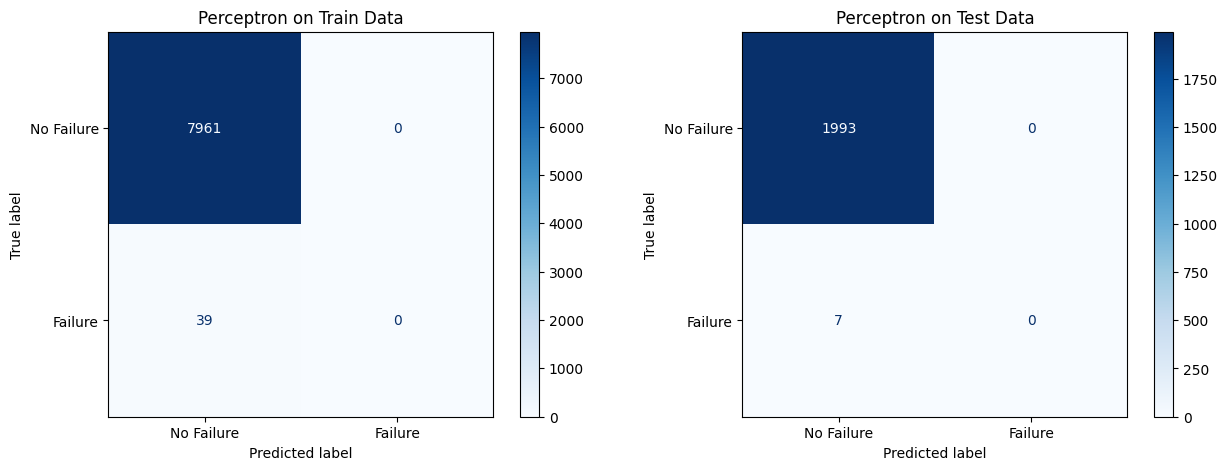

 For `Machine failure` label:
Perceptron  :
- CV F2 Score on Training Data: 0.0
- CV Accuracy on Training Data: 0.995125
- F2 Score on Training Data: 0.0
- F2 Score on Test Data: 0.0
- Accuracy on Training Data: 0.995125
- Accuracy on Test Data: 0.9965
- Recall on Training Data: 0.0
- Recall on Test Data: 0.0
- Precision on Training Data: 0.0
- Precision on Test Data: 0.0


In [29]:
from sklearn.linear_model import Perceptron

model = Perceptron()
analyze_model_performance(model, X_train=X_train[["Tool wear (min)"]], y_train=y_train, X_test=X_test[["Tool wear (min)"]], y_test=y_test, target="TWF")